In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Disable column wrapping

In [199]:
UsersRating = pd.read_csv('Data.csv');
Movies = pd.read_csv('item.csv');
Users = pd.read_csv('user.csv');

In [200]:
Movies.head(5)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [201]:
Users.head(5)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [202]:
UsersRating.head(5)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [203]:
print("Movies shape: ")
print(Movies.shape)
print("\nUsers shape: ")
print(Users.shape)
print("\nData shape: ")
print(UsersRating.shape)

Movies shape: 
(1681, 22)

Users shape: 
(943, 5)

Data shape: 
(100000, 4)


In [204]:
print("\n\nMovie info")
print(Movies.info())
print("\n\nUser info")
print(Users.info())
print("\n\nData info")
print(UsersRating.info())



Movie info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64

In [205]:
print("\n\nMovie describe")
print(Movies.describe())
print("\n\nUser describe")
print(Users.describe())
print("\n\nData describe")
print(UsersRating.describe())



Movie describe
          movie id      unknown       Action    Adventure    Animation    Childrens       Comedy        Crime  Documentary        Drama      Fantasy    Film-Noir       Horror      Musical      Mystery      Romance       Sci-Fi     Thriller          War      Western
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000
mean    841.841761     0.000595     0.149316     0.080309     0.024985     0.072576     0.300416     0.064842     0.029744     0.431291     0.013087     0.014277     0.054729     0.033314     0.036288     0.146936     0.060083     0.149316     0.042237     0.016062
std     485.638077     0.024390     0.356506     0.271852     0.156126     0.259516     0.458576     0.246321     0.169931     0.495404     0.113683     0.118667     0.227519     0.1795

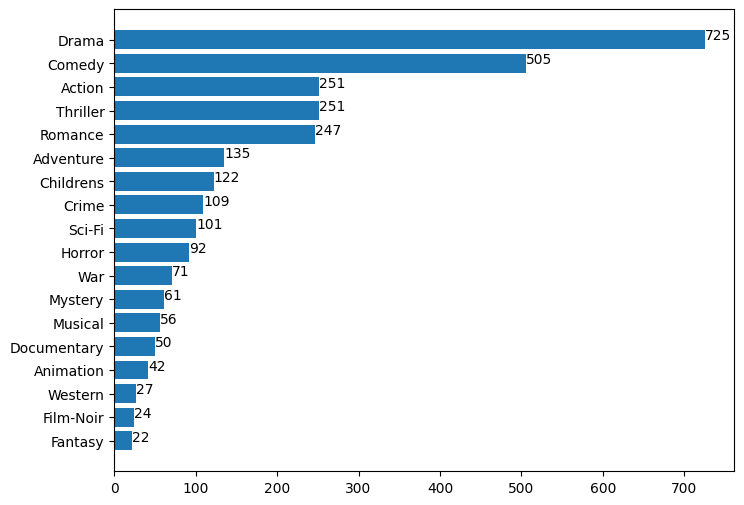

In [206]:
MoviesGenre = Movies.drop(['movie id', 'movie title', 'release date', 'unknown'], axis=1).sum().sort_values()
mx = MoviesGenre.index
my = MoviesGenre.values

plt.rcParams["figure.figsize"] = (8, 6)
plt.barh(mx,my)

for index, value in enumerate(my):
    plt.text(value, index, str(value))

### Removing any movie that has only the 'unknown' column

In [207]:
Movies = Movies.drop(Movies.loc[(Movies['unknown'] == 1) & (Movies.loc[:, 'Action':'Western'].sum(axis=1) == 0)].index)
Movies = Movies.drop('unknown', axis=1)
Movies.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### Adding the 'genre count' column

In [208]:
Movies['genre count'] = Movies.loc[:,'Action':'Western'].sum(axis=1)
print("Movies with more than 1 genre: " + str(len(Movies.loc[Movies['genre count'] > 1])))

Movies with more than 1 genre: 849


### Normalizing the 'release date' and adding the 'release year' column

In [209]:
Movies['release date'] = pd.to_datetime(Movies['release date'])
Movies['release year'] = Movies['release date'].dt.year
Movies.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre count,release year
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,1995-01-01,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,1995-01-01,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,1995-01-01,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3,1995


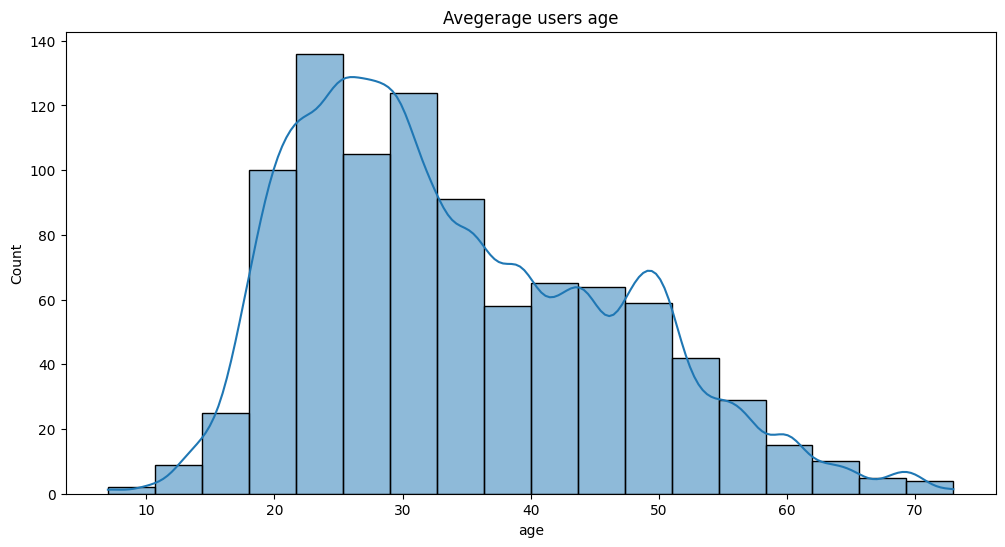

In [210]:
plt.rcParams["figure.figsize"] = (12,6)

ageP = sns.histplot(Users['age'], kde=True, kde_kws={'bw_adjust': 0.4})
plt.title("Avegerage users age")
plt.show()

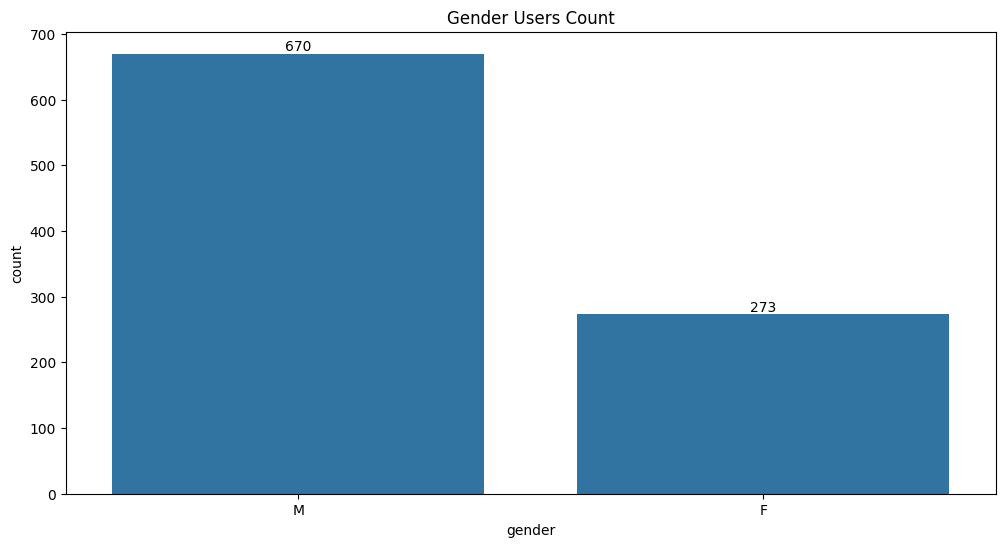

In [211]:
genderP = sns.countplot(x='gender', data=Users)

# Add the value above each bar automatically
genderP.bar_label(genderP.containers[0])

plt.title("Gender Users Count")
plt.show()

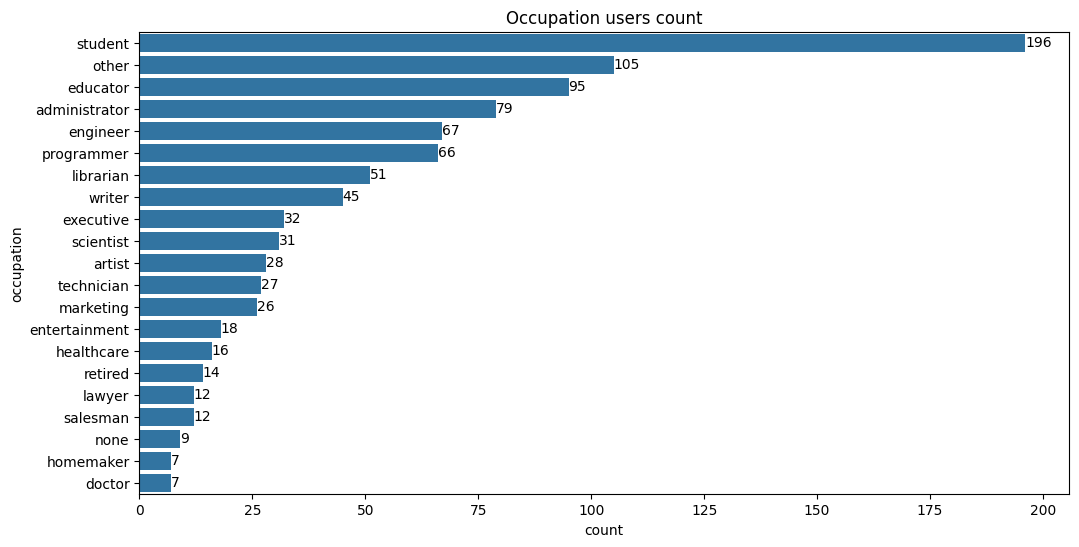

In [212]:
OccuP = sns.countplot(y='occupation', data=Users, order=Users['occupation'].value_counts().index, orient='h')
OccuP.bar_label(OccuP.containers[0])

plt.title("Occupation users count")
plt.show()


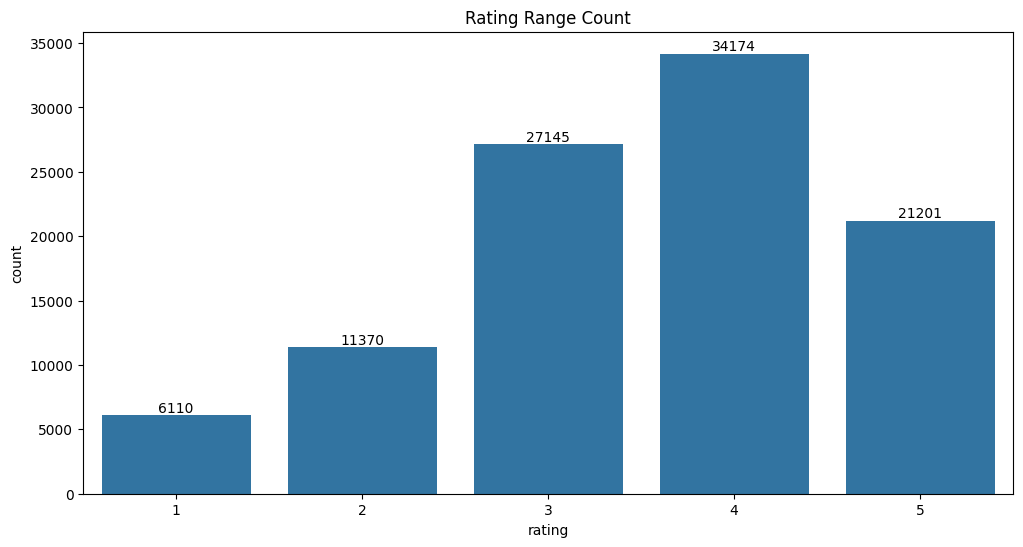

In [213]:

ratingP = sns.countplot(x='rating', data=UsersRating)
ratingP.bar_label(ratingP.containers[0])

plt.title("Rating Range Count")
plt.show()

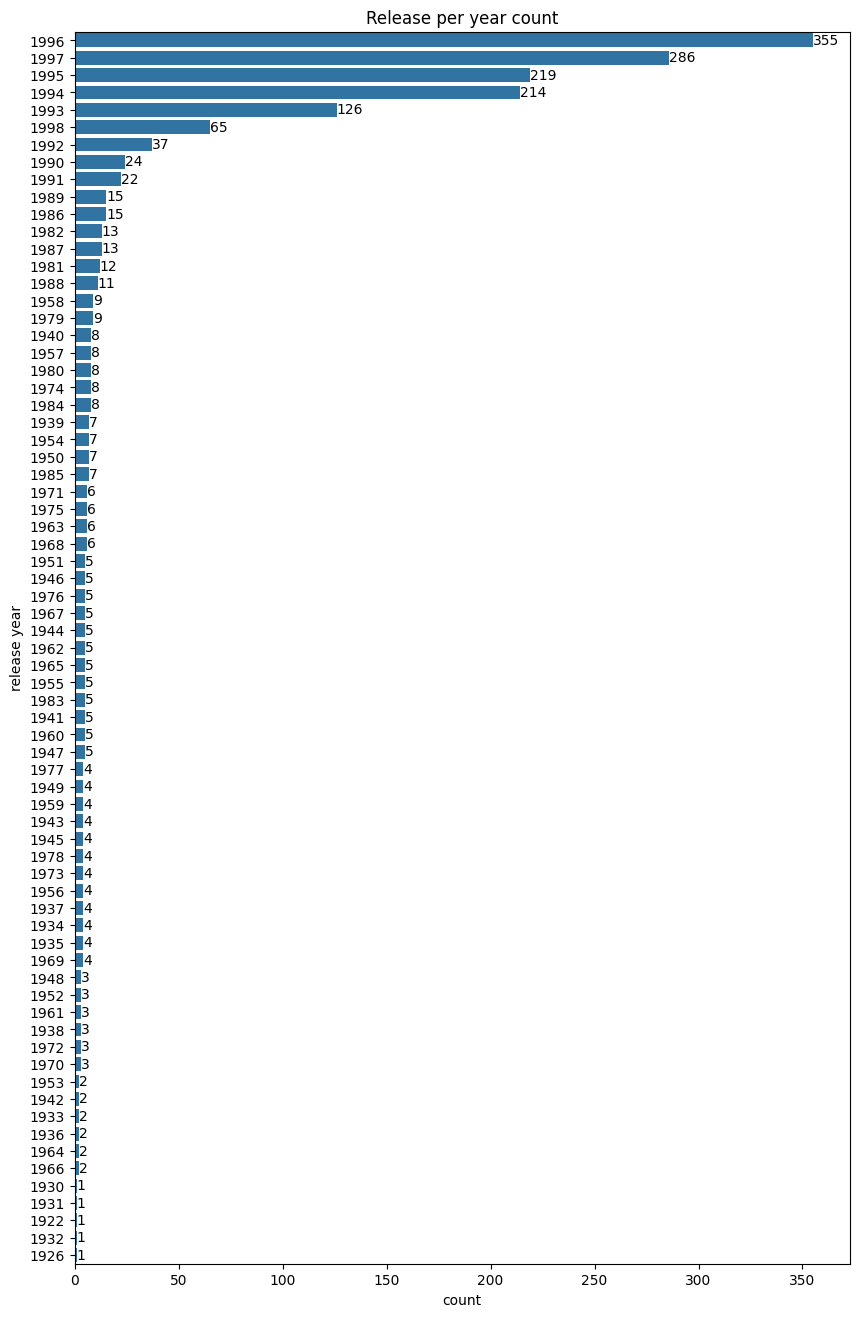

In [214]:

plt.rcParams["figure.figsize"] = (10,16)

releaseP = sns.countplot(y = 'release year', data=Movies, order=Movies['release year'].value_counts().index, orient='h')
releaseP.bar_label(releaseP.containers[0])

plt.title("Release per year count")
plt.show()
plt.rcdefaults()

In [215]:
maxCount = 0
listPopularity = []

for genre in MoviesGenre.index:
    ToPrint = maxCount == 0

    Popularity = pd.DataFrame(Movies, columns=['release year', genre])
    if ToPrint: 
        print("Initial DataFrame for genre:", genre)
        print(Popularity.head())

    Popularity = Popularity.loc[Movies[genre] != 0].sort_values('release year')
    if ToPrint: 
        print("\nAfter filtering and sorting for genre:", genre)
        print(Popularity.head())

    Popularity = Popularity.groupby('release year').count().agg(list).T
    if ToPrint: 
        print("\nAfter grouping and counting for genre:", genre)
        print(Popularity.head())
    
    listPopularity.append(Popularity)
    
    maxGenre = Popularity.max().max()
    if maxCount < maxGenre:
        maxCount = maxGenre

Initial DataFrame for genre: Fantasy
   release year  Fantasy
0          1995        0
1          1995        0
2          1995        0
3          1995        0
4          1995        0

After filtering and sorting for genre: Fantasy
      release year  Fantasy
140           1954        1
1131          1975        1
421           1982        1
1574          1987        1
1034          1991        1

After grouping and counting for genre: Fantasy
release year  1954  1975  1982  1987  1991  1994  1995  1996  1997  1998
Fantasy          1     1     1     1     1     3     3     6     4     1


In [216]:
PopularityFrame = pd.concat(listPopularity)
PopularityFrame = PopularityFrame.fillna(0).sort_index(axis=1)

PopularityFrame.head()

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3,6,4.0,1.0
Film-Noir,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,2.0,2.0
Western,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,6.0,2,2,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,4.0,6,9,3.0,0.0
Documentary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,9.0,5,18,6.0,3.0


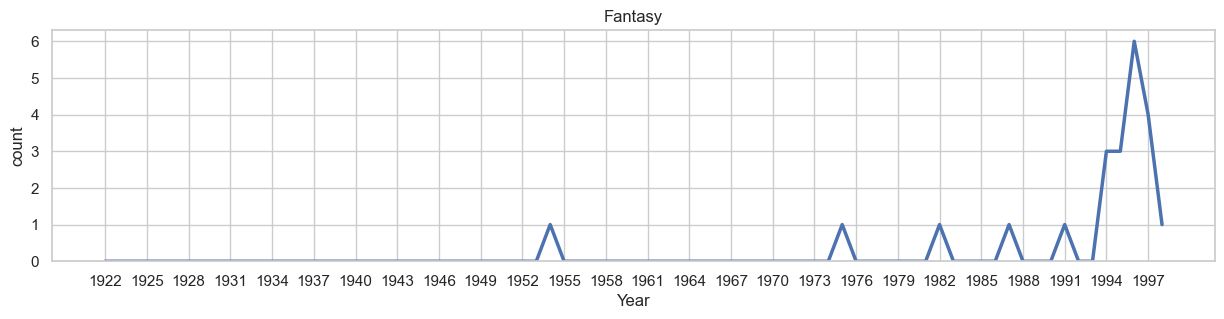

None


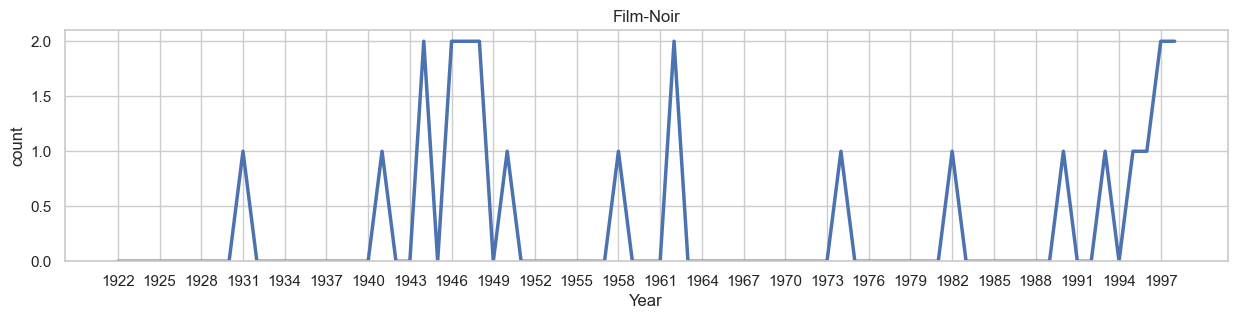

None


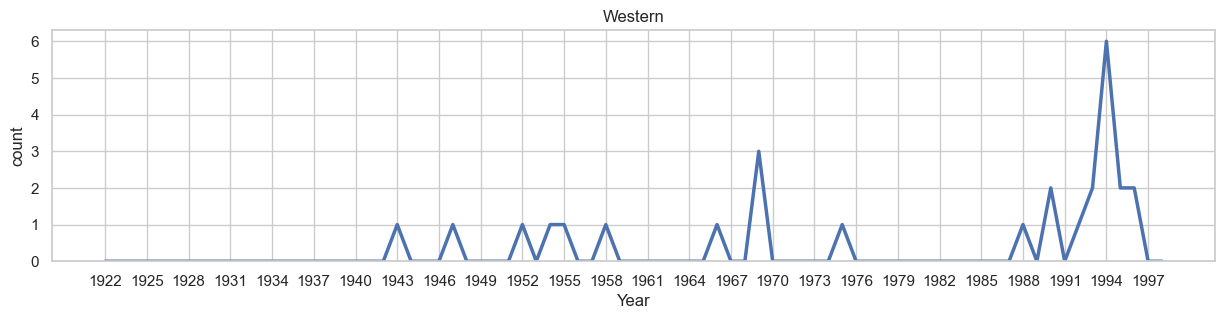

None


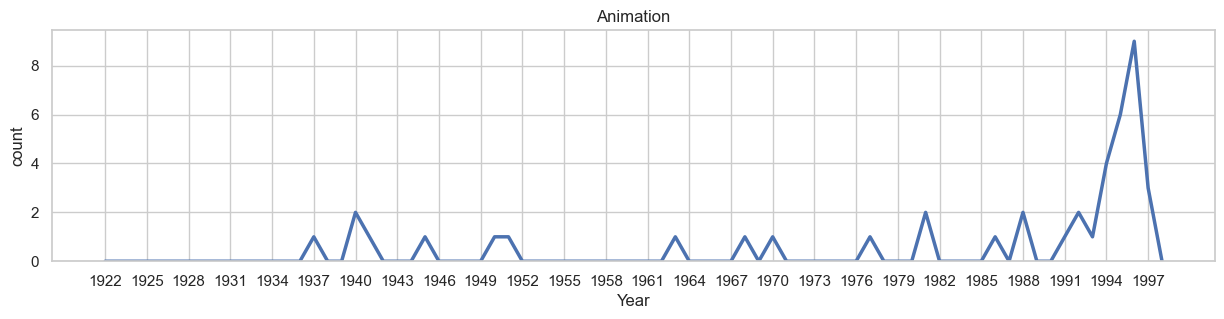

None


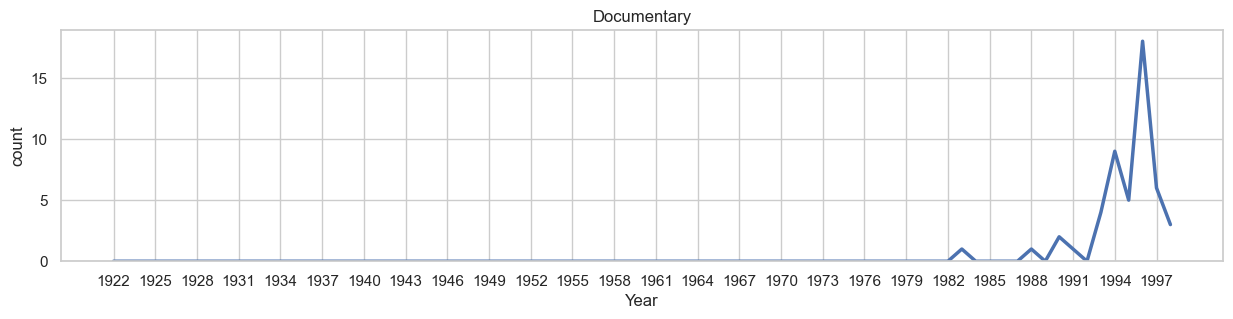

None


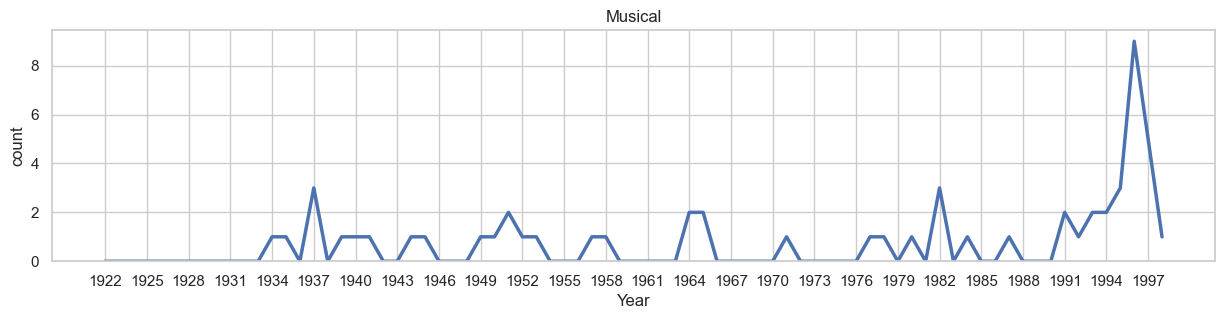

None


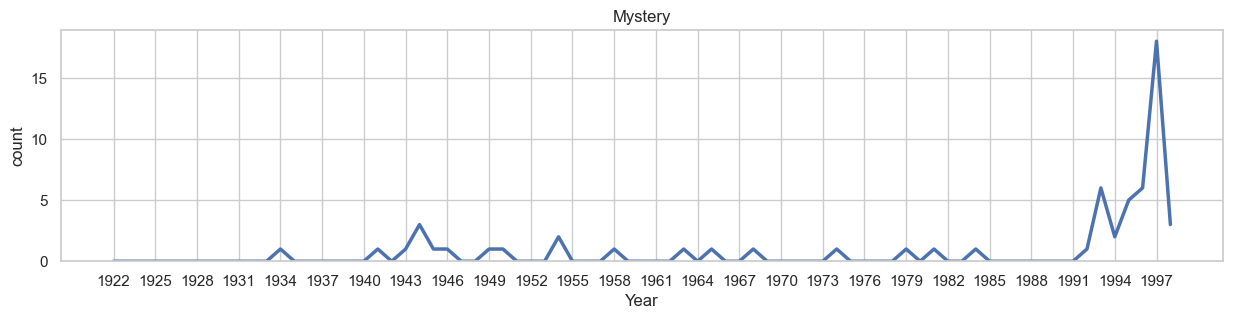

None


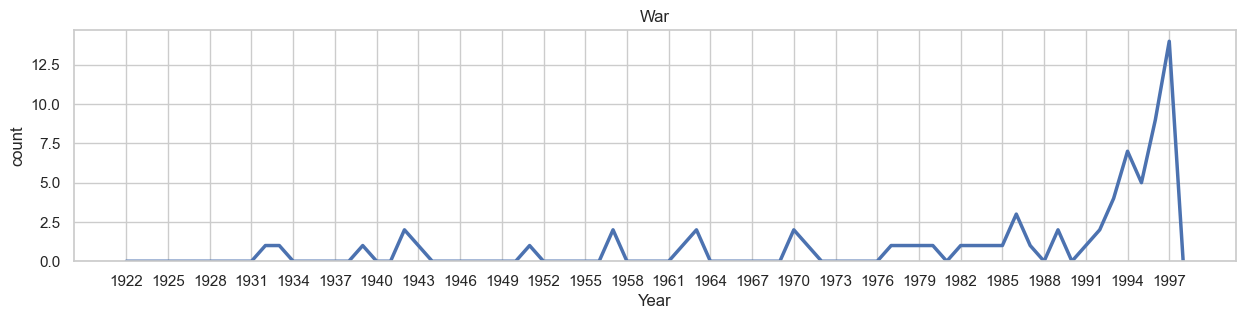

None


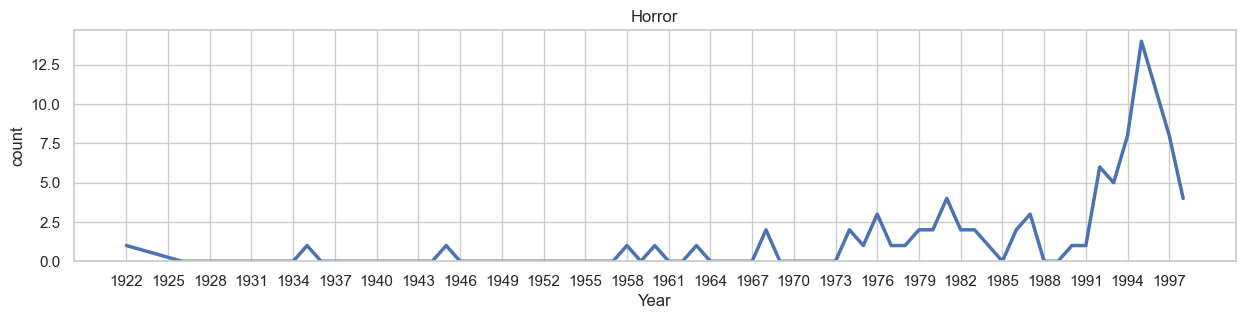

None


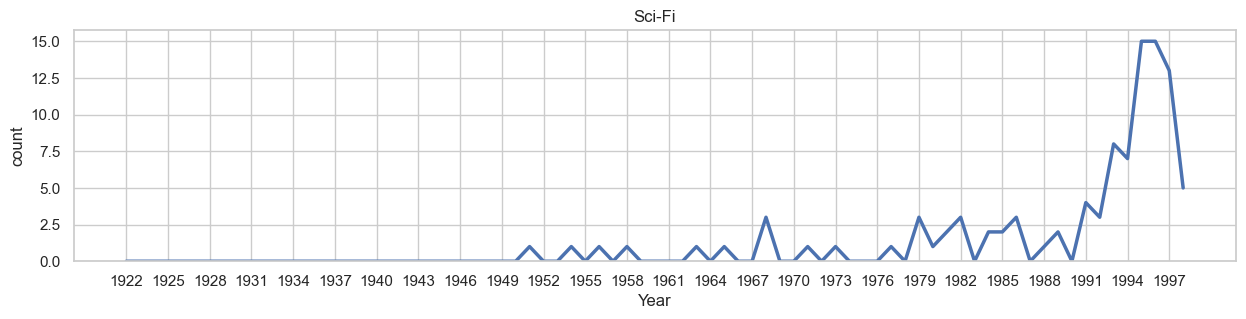

None


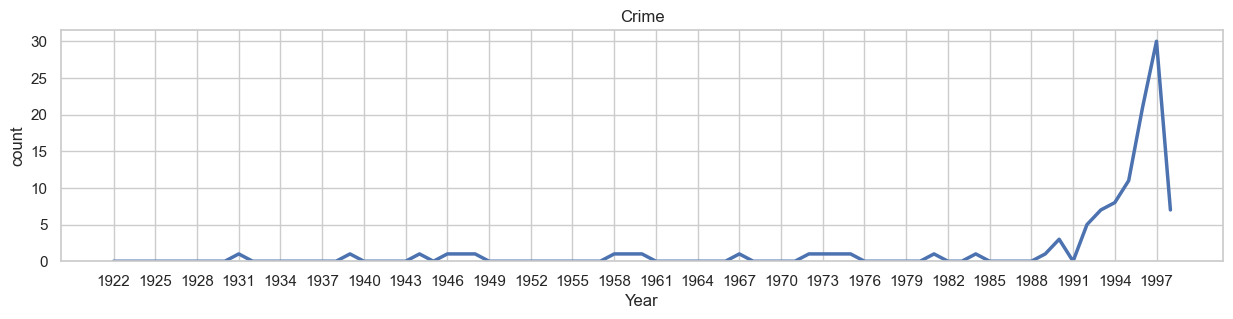

None


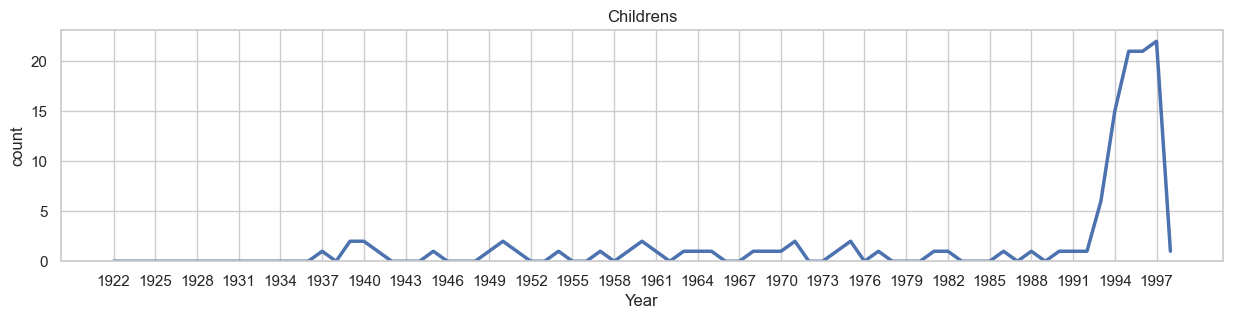

None


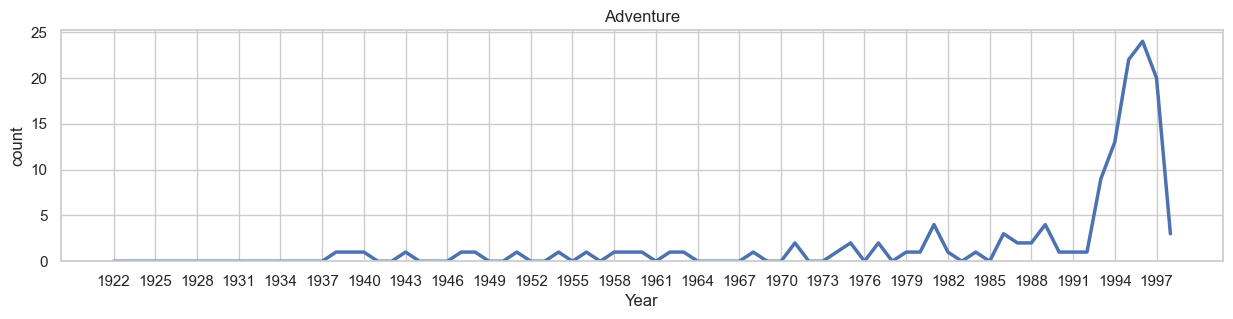

None


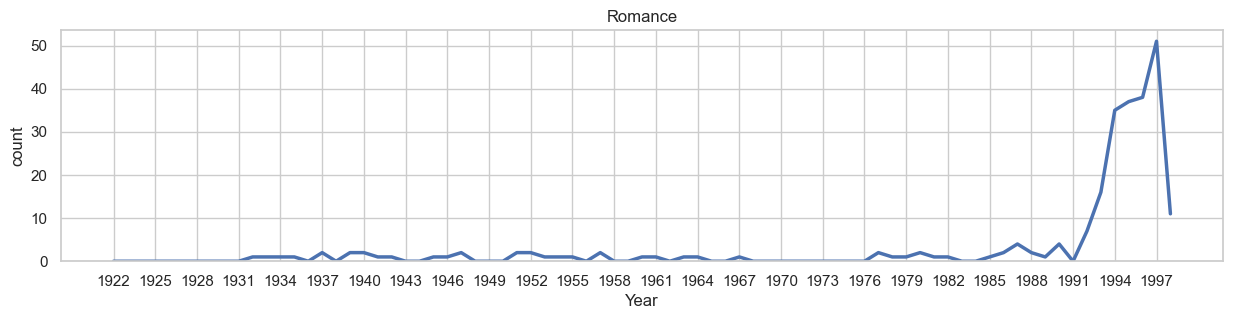

None


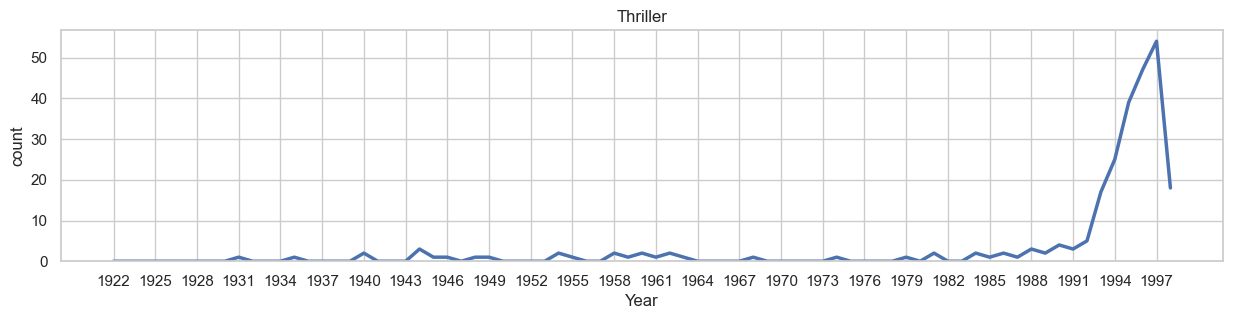

None


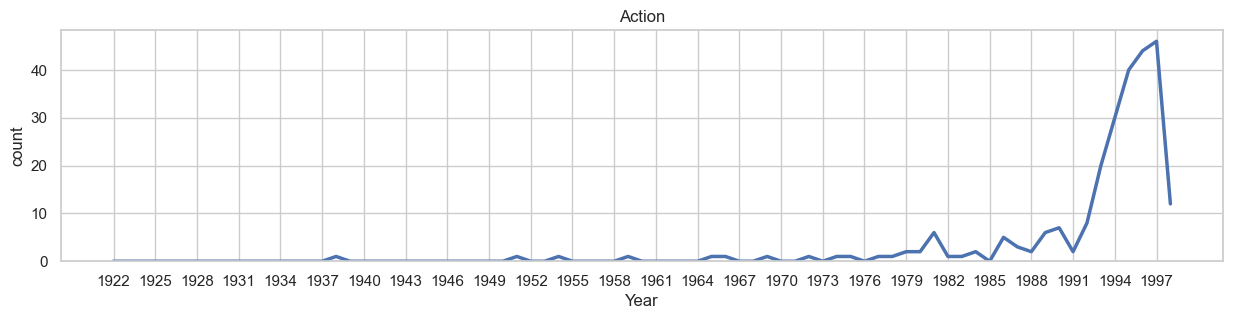

None


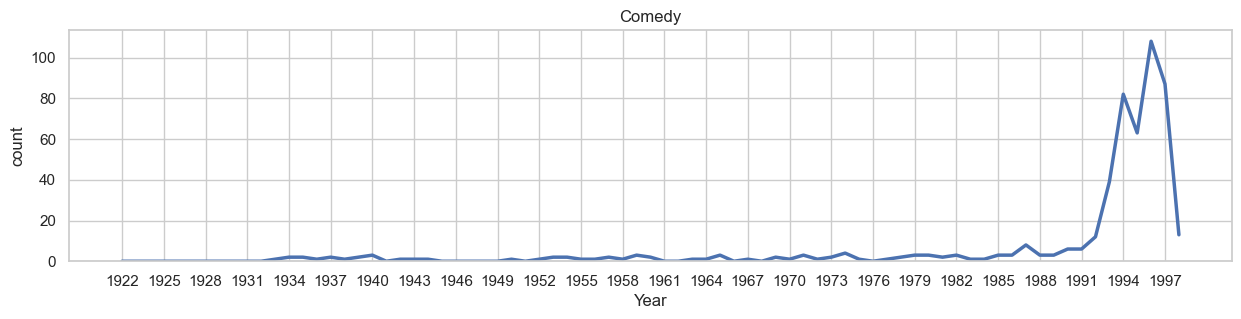

None


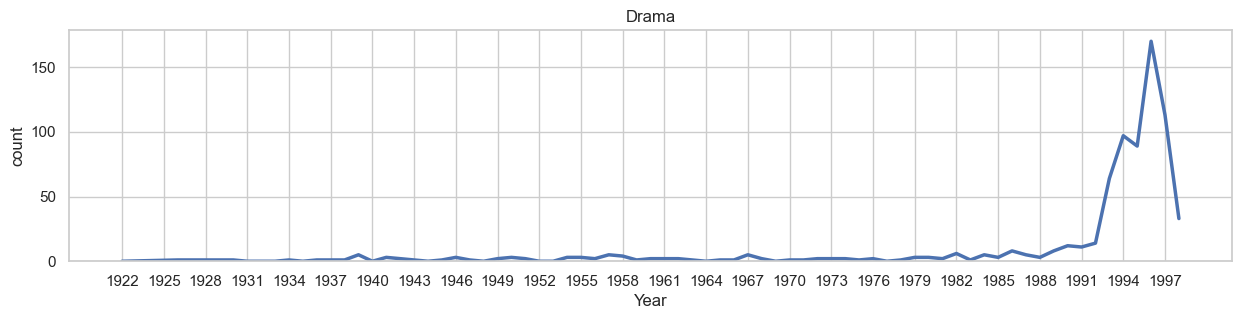

None


In [217]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,3)
for genre in MoviesGenre.index:
    Popularity = pd.DataFrame(PopularityFrame.T, columns=[genre])

    currentG = sns.lineplot(Popularity[genre], linewidth=2.5)
    currentG.set_xticks(np.arange(Popularity.index.min(), Popularity.index.max() + 1, 3))

    #plt.ylim(top=maxCount)
    plt.ylim(bottom=0)
    plt.xlabel('Year')
    plt.ylabel('count')
    plt.title(genre)
    print(plt.show())
    
plt.rcdefaults()

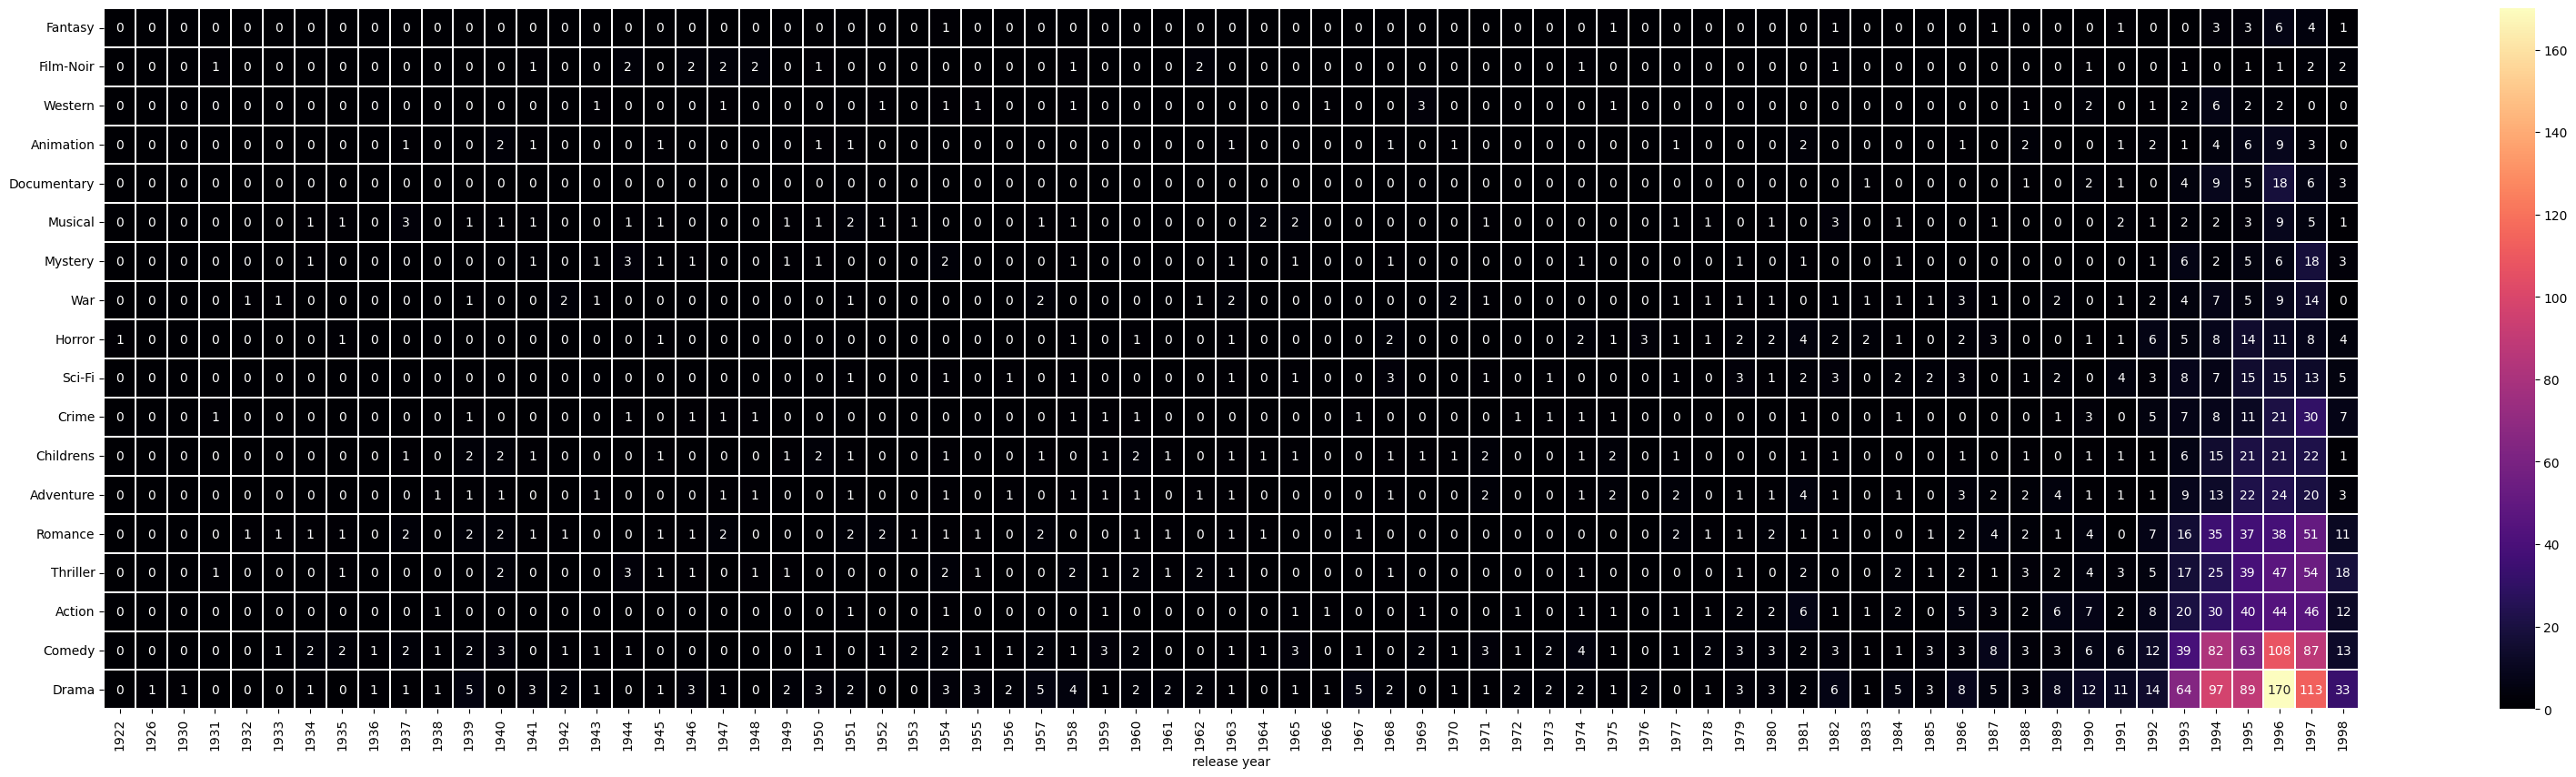

In [218]:
fig, ax = plt.subplots(figsize=(40,10))

sns.heatmap(PopularityFrame, ax=ax, annot=True, linewidths=0.05,cmap='magma', fmt='.0f', cbar_kws={'format': '%.0f'})

plt.show()

### 25 Best Movies that were voted by at least 100 people

In [219]:
OneForAllMR = pd.merge(left=Movies, right=UsersRating , on="movie id",  how='left')
OneForAllMR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie id      99990 non-null  int64         
 1   movie title   99990 non-null  object        
 2   release date  99990 non-null  datetime64[ns]
 3   Action        99990 non-null  int64         
 4   Adventure     99990 non-null  int64         
 5   Animation     99990 non-null  int64         
 6   Childrens     99990 non-null  int64         
 7   Comedy        99990 non-null  int64         
 8   Crime         99990 non-null  int64         
 9   Documentary   99990 non-null  int64         
 10  Drama         99990 non-null  int64         
 11  Fantasy       99990 non-null  int64         
 12  Film-Noir     99990 non-null  int64         
 13  Horror        99990 non-null  int64         
 14  Musical       99990 non-null  int64         
 15  Mystery       99990 non-null  int64 

In [220]:
MoviesRating = pd.DataFrame(OneForAllMR, columns=['movie title', 'rating'])
MoviesRating.head()

,movie title,rating
0,Toy Story,4
1,Toy Story,5
2,Toy Story,4
3,Toy Story,4
4,Toy Story,3


In [221]:

MoviesRatingC = MoviesRating.groupby('movie title', as_index=False).count().agg(list)
#Filtering by the amount of votes
MoviesRatingC = MoviesRatingC.loc[MoviesRatingC['rating']>100]
MoviesRatingC.head()

,movie title,rating
2,101 Dalmatians,109
3,12 Angry Men,125
7,2001: A Space Odyssey,259
15,Absolute Power,127
16,"Abyss, The",151


In [222]:
MoviesRatingG = MoviesRating.groupby('movie title', as_index=False).mean().agg(list)
MoviesRatingG = MoviesRatingG.loc[MoviesRatingC.index].sort_values(by='rating', ascending=False).head(25)
MoviesRatingG.head()

,movie title,rating
317,"Close Shave, A",4.491071
1277,Schindler's List,4.466443
1646,"Wrong Trousers, The",4.466102
272,Casablanca,4.456790
1312,"Shawshank Redemption, The",4.445230


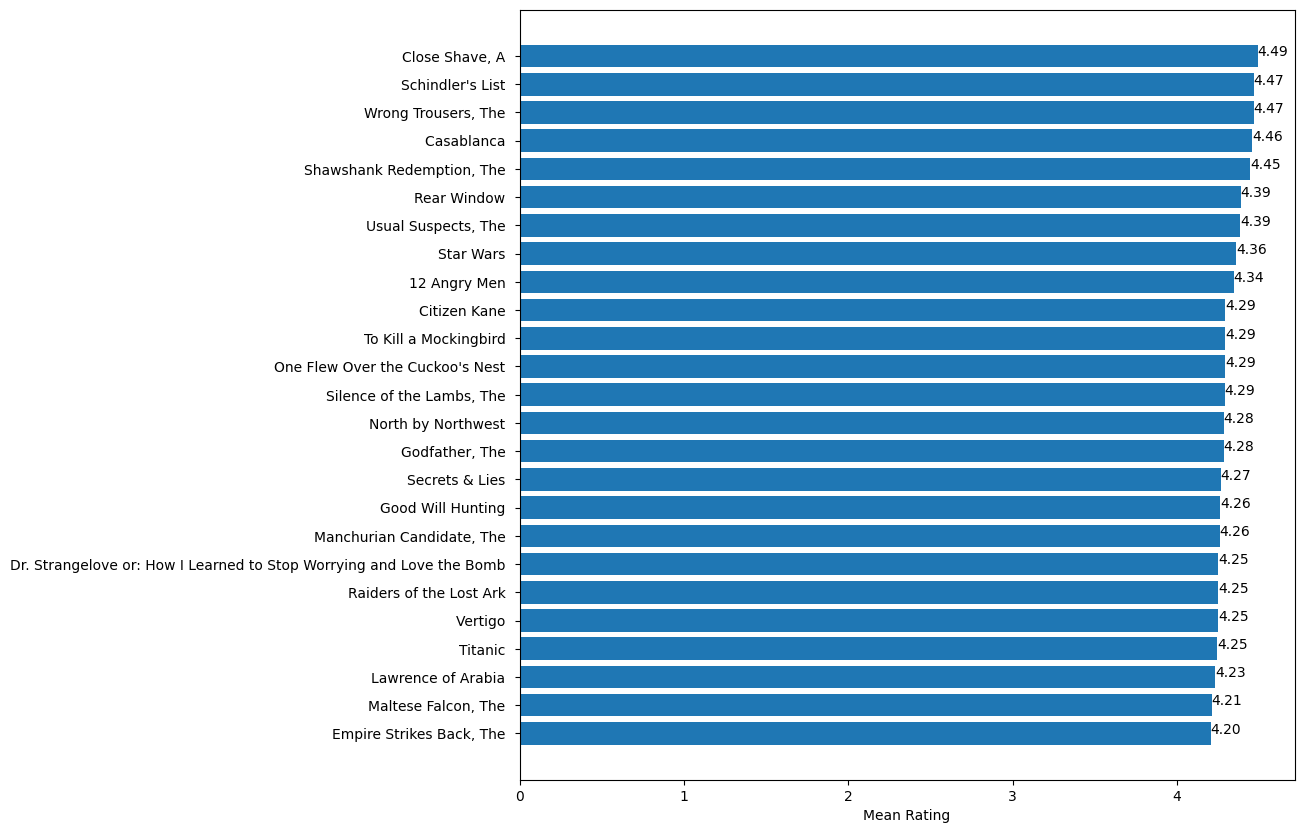

In [223]:
MoviesRatingG = MoviesRatingG.sort_values(by='rating', ascending=True)
mox = MoviesRatingG['movie title']
moy = MoviesRatingG['rating']

plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

ax.barh(mox, moy)
ax.set_xlabel('Mean Rating')

for index, value in enumerate(moy):
    plt.text(value, index, f"{value:.2f}")

plt.show()

In [224]:
OneForAllUS = pd.merge(left=OneForAllMR, right=Users , on="user id",  how='left')
OneForAllUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie id      99990 non-null  int64         
 1   movie title   99990 non-null  object        
 2   release date  99990 non-null  datetime64[ns]
 3   Action        99990 non-null  int64         
 4   Adventure     99990 non-null  int64         
 5   Animation     99990 non-null  int64         
 6   Childrens     99990 non-null  int64         
 7   Comedy        99990 non-null  int64         
 8   Crime         99990 non-null  int64         
 9   Documentary   99990 non-null  int64         
 10  Drama         99990 non-null  int64         
 11  Fantasy       99990 non-null  int64         
 12  Film-Noir     99990 non-null  int64         
 13  Horror        99990 non-null  int64         
 14  Musical       99990 non-null  int64         
 15  Mystery       99990 non-null  int64 

### Female gender Distribution

In [225]:
FemaleDistribution = OneForAllUS.loc[(OneForAllUS['gender'] == 'F')]
FemaleDistribution.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre count,release year,user id,rating,timestamp,age,gender,occupation,zip code
3,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,280,4,891700426,30,F,librarian,22903
5,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,5,4,875635748,33,F,other,15213
15,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,150,4,878746441,20,F,artist,02139
18,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,49,2,888068651,23,F,student,76111
19,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,223,4,891549324,19,F,student,47906


In [308]:
FemaleCount = {}
FemaleTotal = FemaleDistribution.drop_duplicates(subset=['movie id', 'user id']).index.size
print(FemaleTotal)

# Calculate the count and percentage for each genre
for genre in MoviesGenre.index:
    genre_sum = FemaleDistribution[genre].sum()
    percentage = (genre_sum / FemaleTotal) * 100
    FemaleCount[genre] = [genre_sum, percentage]

# Convert the dictionary to a DataFrame
FemalePopularity = pd.DataFrame.from_dict(FemaleCount, orient='index', columns=['Count', 'Percentage']).sort_values(by='Percentage', ascending=False)

# Print the DataFrame
print(FemalePopularity)

25738
             Count  Percentage
Drama        11008   42.769446
Comedy        8068   31.346647
Romance       5858   22.760121
Action        5442   21.143834
Thriller      5086   19.760665
Adventure     3141   12.203745
Sci-Fi        2629   10.214469
Childrens     2232    8.672002
War           2189    8.504934
Crime         1794    6.970239
Musical       1442    5.602611
Mystery       1314    5.105292
Horror        1197    4.650711
Animation      995    3.865879
Film-Noir      385    1.495843
Western        371    1.441448
Fantasy        363    1.410366
Documentary    187    0.726552


C:\Users\Eduardo Rauchbach\AppData\Local\Temp\ipykernel_4104\1624914533.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value, index, f"{FemalePopularity['Percentage'][index]:.2f}%")


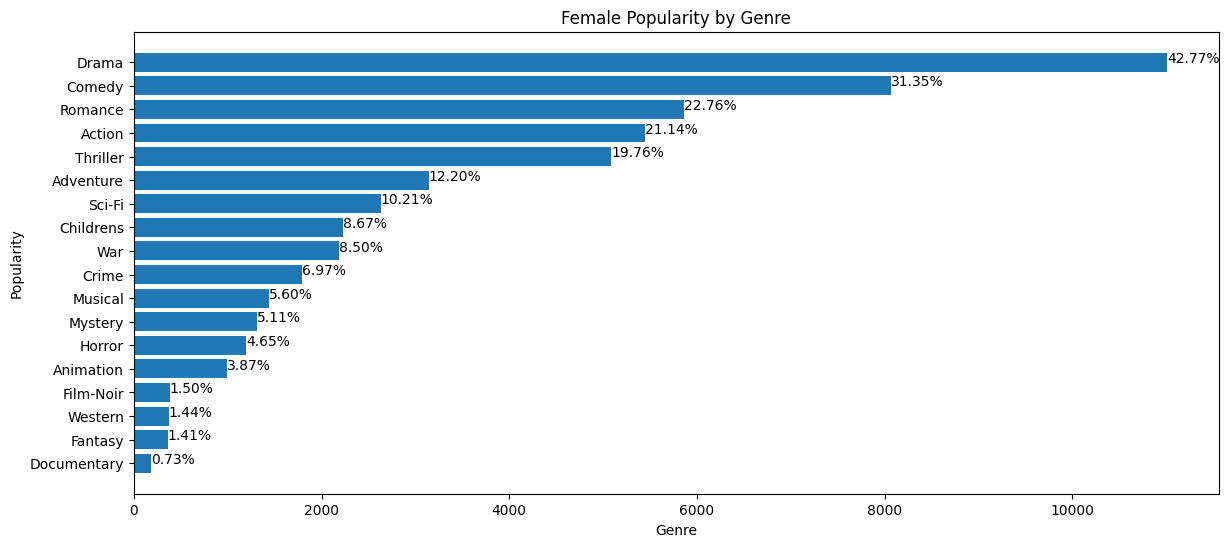

In [310]:
FemalePopularity = FemalePopularity.sort_values(by='Percentage', ascending=True)

plt.figure(figsize=(14, 6))
plt.barh(FemalePopularity.index, FemalePopularity['Count'])
plt.title('Female Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')

for index, value in enumerate(FemalePopularity['Count']):
    plt.text(value, index, f"{FemalePopularity['Percentage'][index]:.2f}%")
    
plt.show()

### Male gender Distribution

In [264]:
MaleDistribution = OneForAllUS.loc[(OneForAllUS['gender'] == 'M')]
MaleDistribution.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre count,release year,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,308,4,887736532,60,M,retired,95076
1,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,287,5,875334088,21,M,salesman,31211
2,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,148,4,877019411,33,M,engineer,97006
4,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,66,3,883601324,23,M,student,80521
6,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1995,109,4,880563619,29,M,other,55423


In [312]:
MaleCount = {}
MaleTotal = MaleDistribution.drop_duplicates(subset=['movie id', 'user id']).index.size
print(MaleTotal)

# Calculate the count and percentage for each genre
for genre in MoviesGenre.index:
    genre_sum = MaleDistribution[genre].sum()
    percentage = (genre_sum / MaleTotal) * 100
    MaleCount[genre] = [genre_sum, percentage]

# Convert the dictionary to a DataFrame
MalePopularity = pd.DataFrame.from_dict(MaleCount, orient='index', columns=['Count', 'Percentage']).sort_values(by='Percentage', ascending=False)

# Print the DataFrame
print(MalePopularity)

74252
             Count  Percentage
Drama        28887   38.904003
Comedy       21764   29.310995
Action       20147   27.133276
Thriller     16786   22.606798
Romance      13603   18.320045
Adventure    10612   14.291871
Sci-Fi       10101   13.603674
War           7209    9.708829
Crime         6261    8.432096
Childrens     4950    6.666487
Horror        4120    5.548672
Mystery       3931    5.294133
Musical       3512    4.729839
Animation     2610    3.515057
Western       1483    1.997253
Film-Noir     1348    1.815439
Fantasy        989    1.331951
Documentary    571    0.769003


C:\Users\Eduardo Rauchbach\AppData\Local\Temp\ipykernel_4104\3507291226.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value, index, f"{MalePopularity['Percentage'][index]:.2f}%")


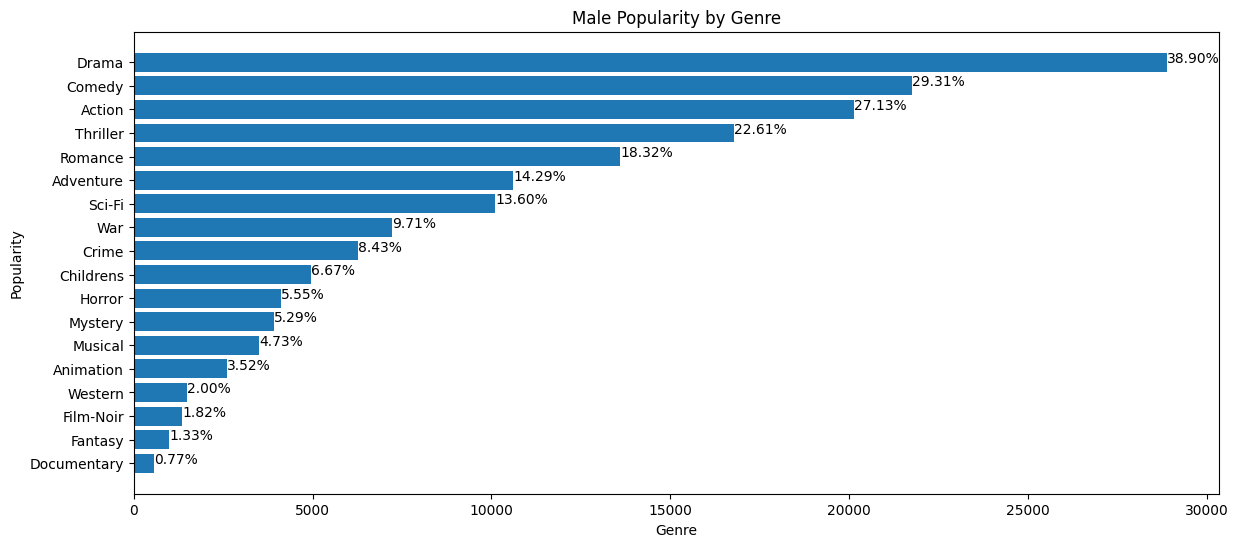

In [313]:
MalePopularity = MalePopularity.sort_values(by='Percentage', ascending=True)

plt.figure(figsize=(14, 6))
plt.barh(MalePopularity.index, MalePopularity['Count'])
plt.title('Male Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')

for index, value in enumerate(MalePopularity['Count']):
    plt.text(value, index, f"{MalePopularity['Percentage'][index]:.2f}%")
    
plt.show()